In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import io
import os
import re

# Summary

1. $\alpha$ = learning rate (0 < $\alpha$ < 1)
2. $\beta$ = inverse temperature (0 < $\beta$ < 10)
3. $w$ = model-based vs. model-free (0 < $w$ < 1)
4. $\gamma$ = decay rate (0 < $\gamma$ < 1)
  

|   |          | Total 200 trials | 100 trials per # of first states |
|---|----------|------------|------------|
|   | n stages | TD         | TD         |
| $\alpha$  | 2        | 0.29       | 0.24       |
|   | 3        | 0.21       | 0.27       |
|   | 4        | 0.19       | 0.24       |
|   | 5        | 0.15       | 0.29       |
| $\beta$  | 2        | 0.52       | 0.51       |
|   | 3        | 0.28       | 0.42       |
|   | 4        | 0.29       | 0.35       |
|   | 5        | 0.23       | 0.39       |
| $w$  | 2        | 0.42       | 0.33       |
|   | 3        | 0.31       | 0.46       |
|   | 4        | 0.3        | 0.4        |
|   | 5        | 0.24       | 0.46       |
| $\gamma$  | 2        | 0.32       | 0.23       |
|   | 3        | 0.26       | 0.43       |
|   | 4        | 0.27       | 0.39       |
|   | 5        | 0.17       | 0.39       |

 
 * Notes & thoughts:
1. 100 trials per first-stage state: experiments with 2 second-stage states have 100, 3 states have 300, 4 states have 600, and 5 states have 1000 total trials. It does seem having trials proportionate to number of states improve recovery as the number of states increase.


# 1. Total number of trials fixed to 200

## 1-1) TD (no counterfactual)

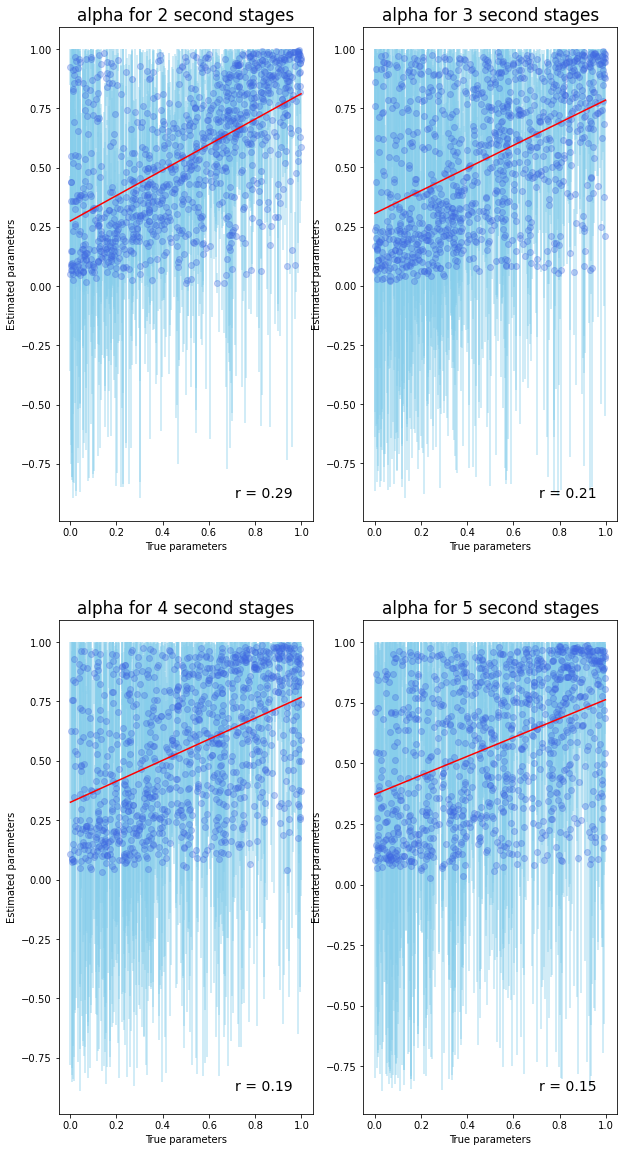

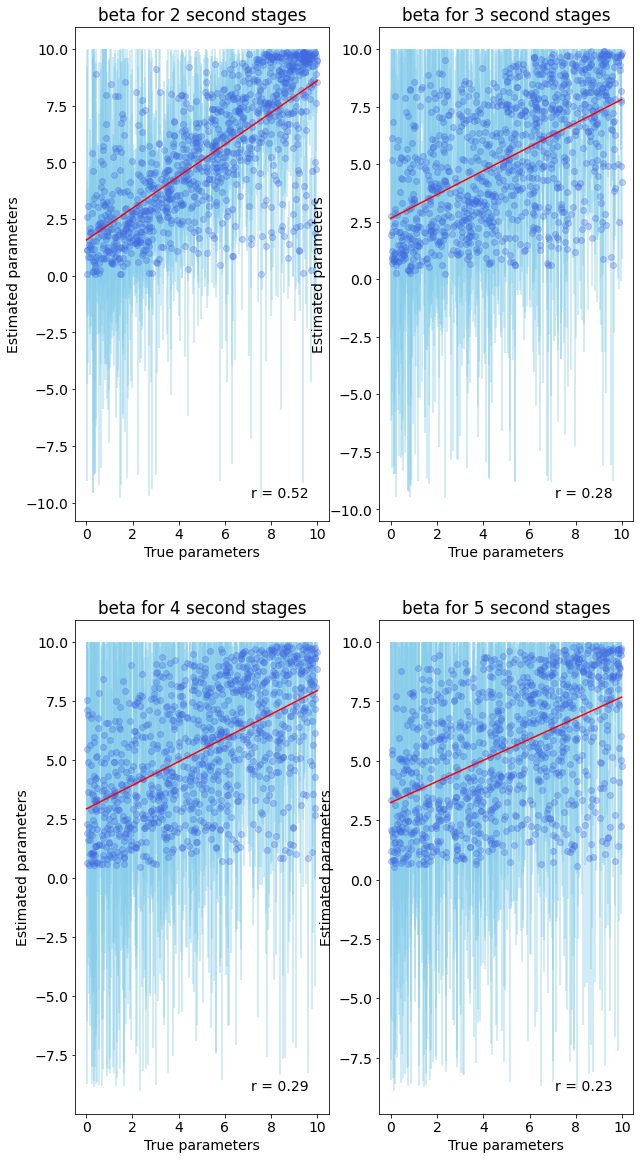

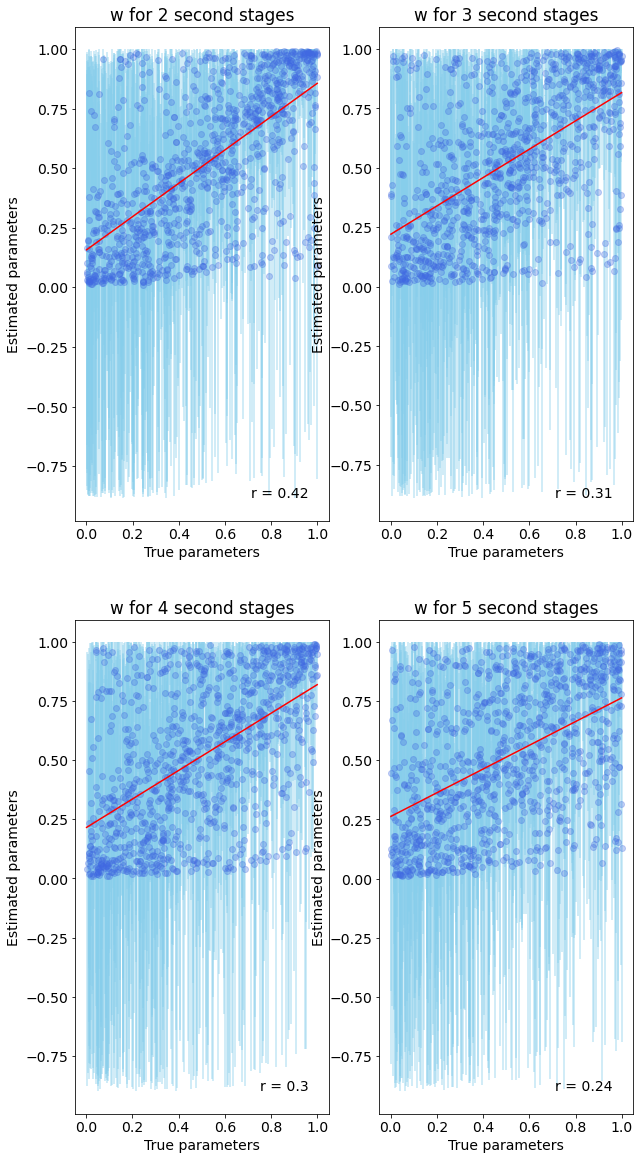

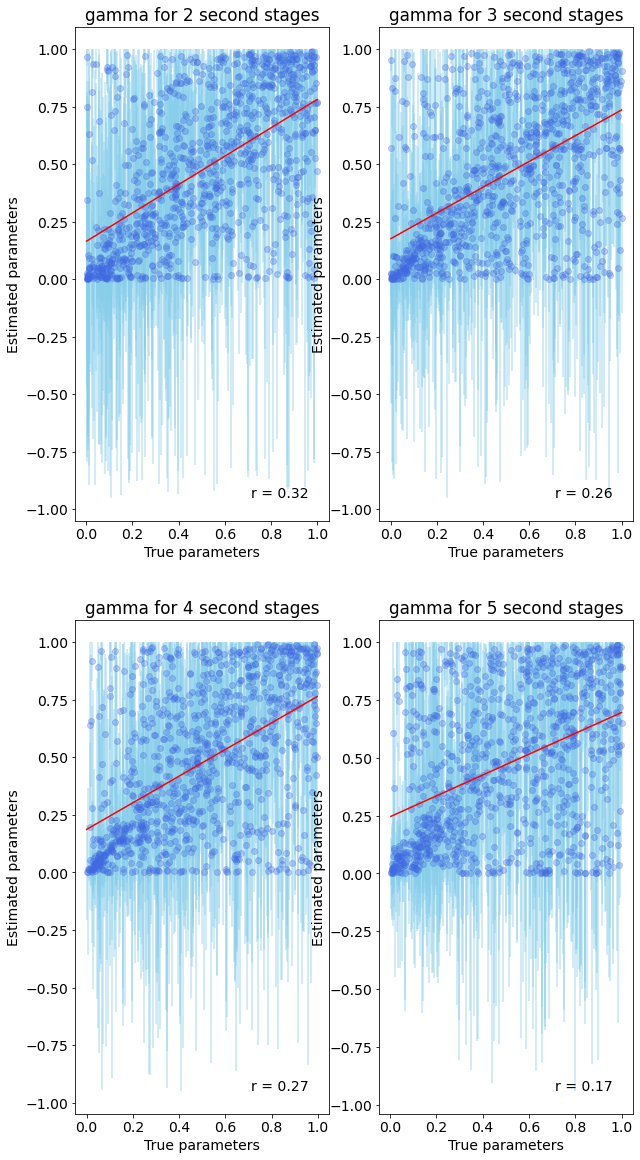

In [2]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']
datatable=[]
for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})

        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')

        ax.annotate('r = '+str(np.round(r2,2)),xy=(1,0),xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
        
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
#         print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))
        datatable.append(np.round(r2,2))

# for i in datatable:
#     print(i)

# 2. Number of trials proportionate to number of first-stage states (100 each; 100 trials for 2, 300 trials for 3, 600 trials for 4, and 1000 trials for 5 second states)

## 2-1) TD (no counterfactual)

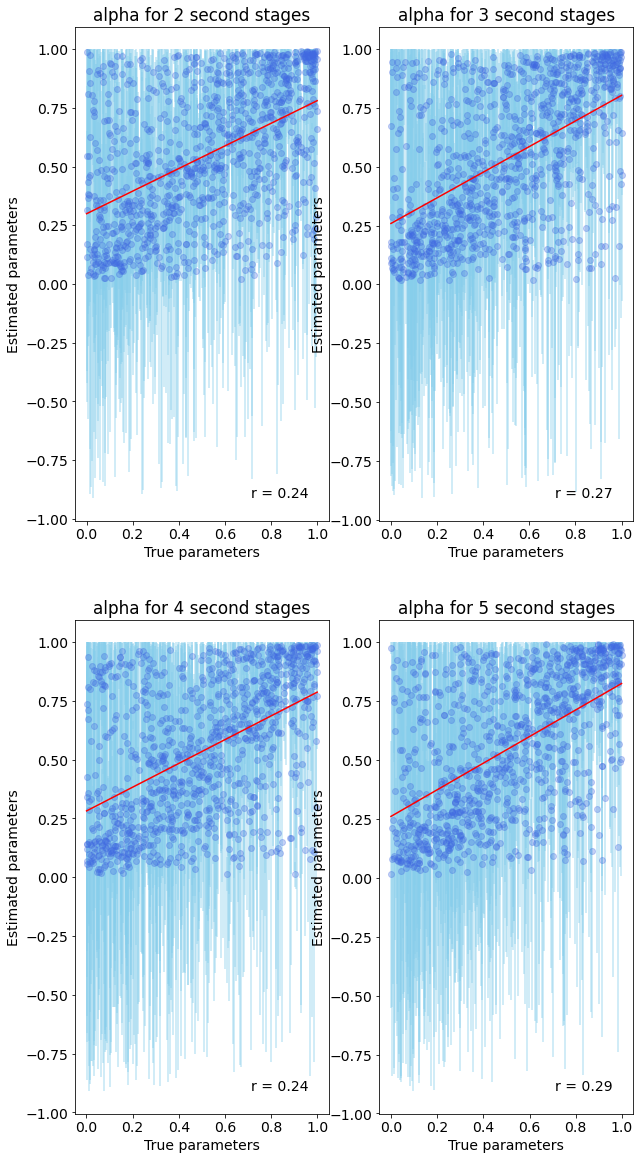

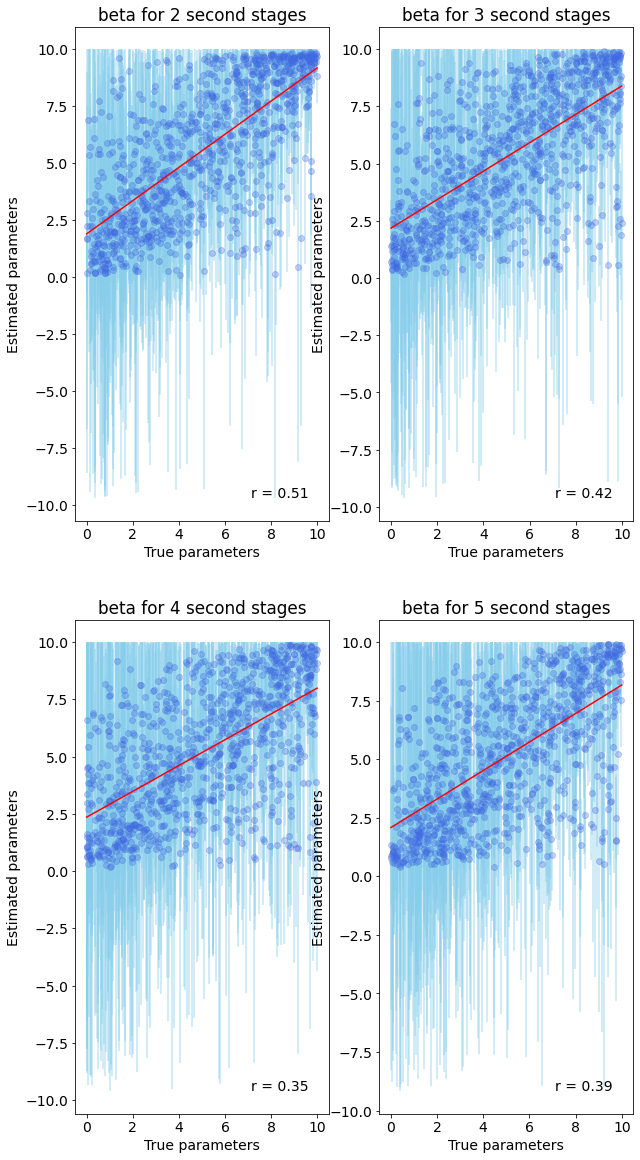

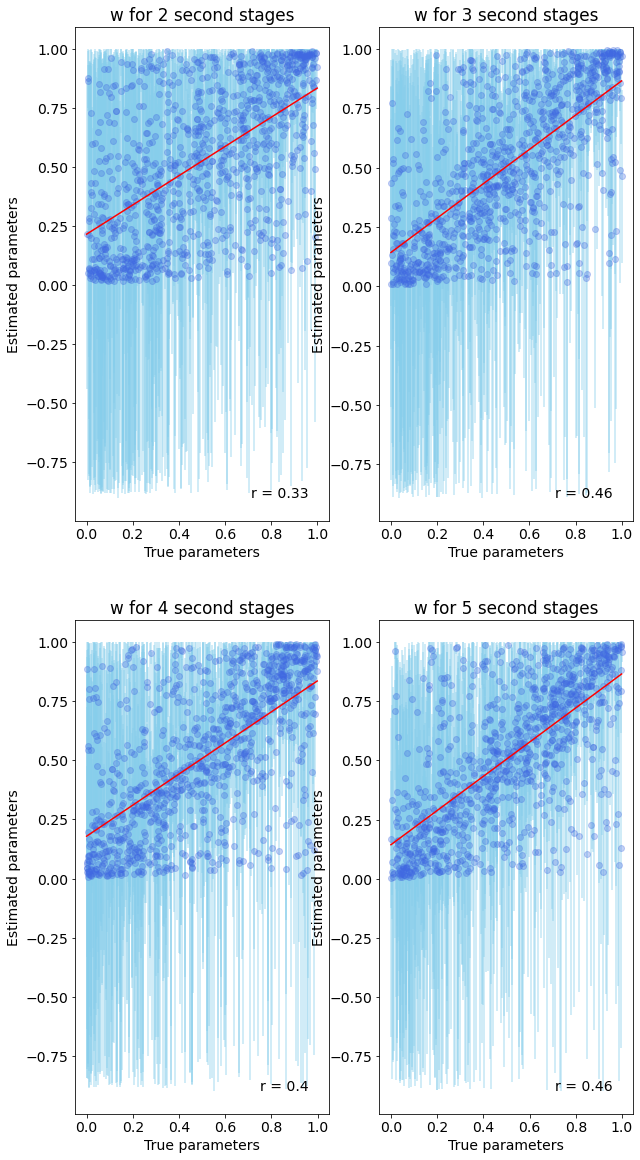

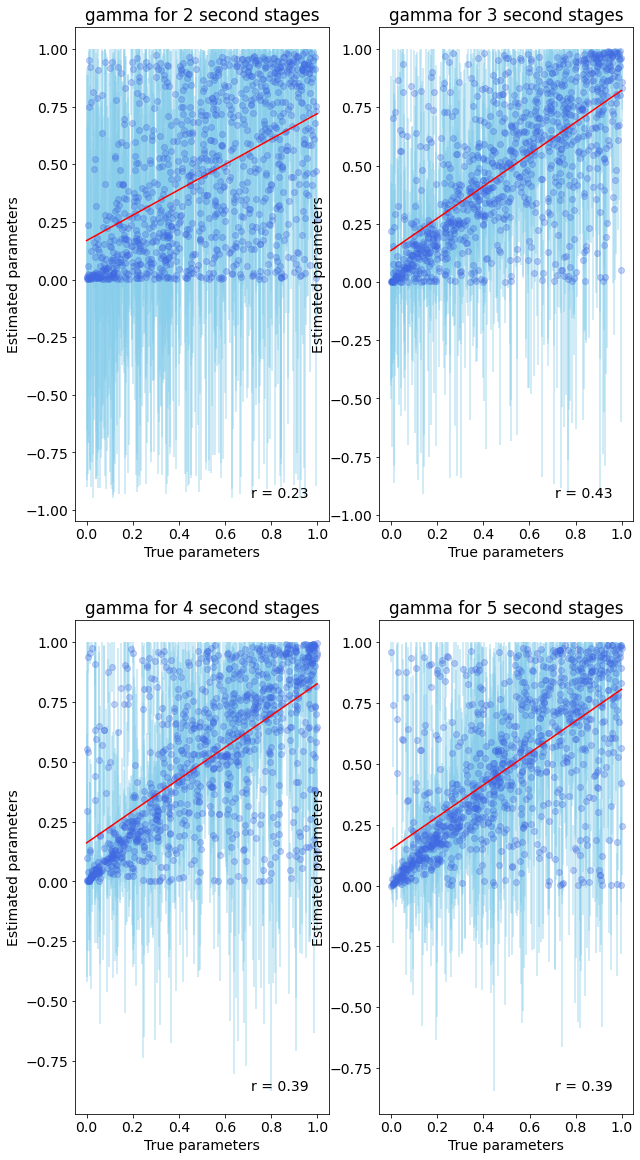

In [3]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']
datatable=[]
for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_moretrials_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
     
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        ax.annotate('r = '+str(np.round(r2,2)),xy=(1,0),xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
#         print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))

        datatable.append(np.round(r2,2))
# for i in datatable:
#     print(i)